In [6]:
# ===== Step 1: Load dataset and initial checks =====
import pandas as pd

# 1) Load (assumes file is in the same folder as the notebook)
df = pd.read_csv("Mall_Customers.csv")

# 2) Quick checks to print / display everything we want in the report
print(">>> Shape:", df.shape, "\n")          # (rows, cols)
print(">>> Columns:\n", df.columns, "\n")

print(">>> First 8 rows:")
display(df.head(8))

print("\n>>> Info (dtypes / non-null counts):")
df.info()   # prints to output

print("\n>>> Missing values per column:\n", df.isnull().sum(), "\n")

print(">>> Duplicate rows (count):", df.duplicated().sum(), "\n")

print(">>> Gender value counts:\n", df['Gender'].value_counts(), "\n")

print(">>> Numeric summary (describe):\n", df.describe())

>>> Shape: (200, 5) 

>>> Columns:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object') 

>>> First 8 rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94



>>> Info (dtypes / non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

>>> Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

>>> Duplicate rows (count): 0 

>>> Gender value counts:
 Gender
Female    112
Male       88
Name: count, dtype: int64 

>>> Numeric summary (describe):
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.00000

C:\Users\ahmed\AppData\Local\Temp\ipykernel_21524\3943183795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


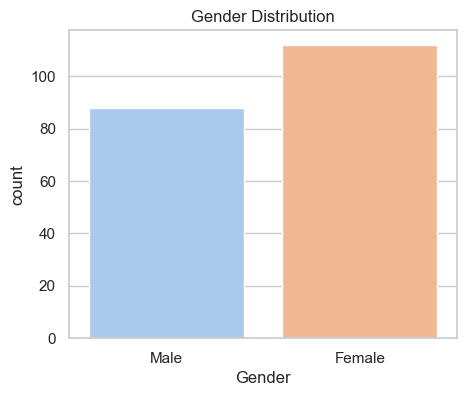

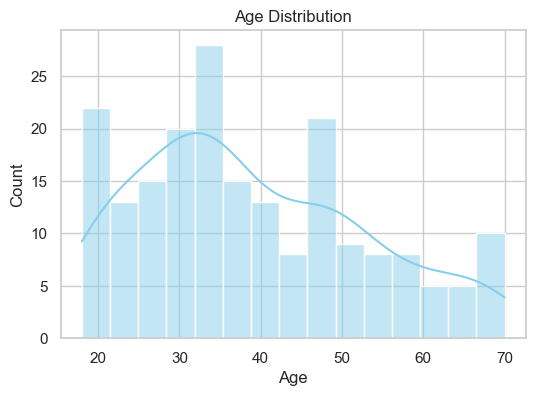

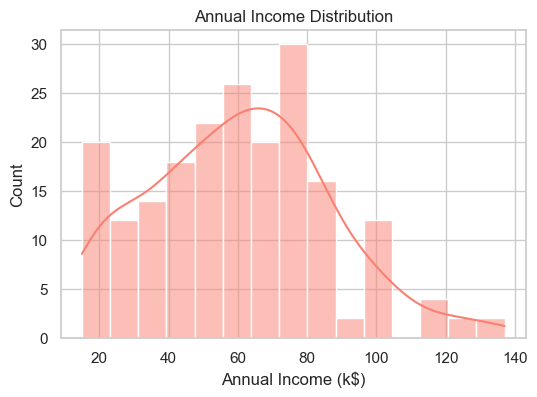

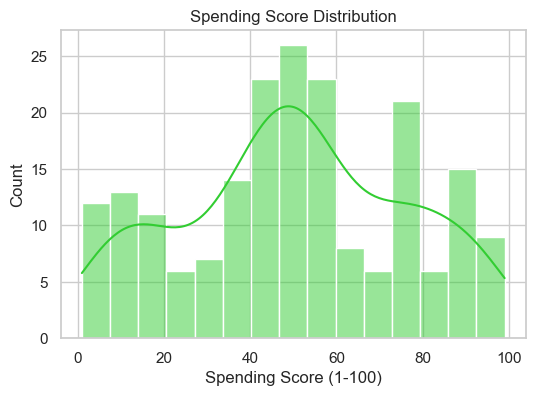

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Gender distribution (categorical)
plt.figure(figsize=(5,4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.show()

# 2. Age distribution (numeric)
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# 3. Annual Income distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Annual Income (k$)"], bins=15, kde=True, color="salmon")
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.show()

# 4. Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=15, kde=True, color="limegreen")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.show()

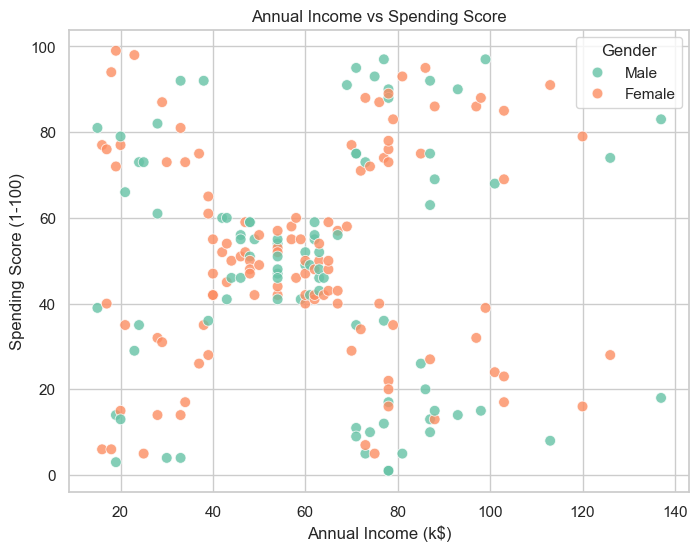

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    data=df, 
    hue="Gender", 
    palette="Set2", 
    s=60, alpha=0.8
)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Gender")
plt.show()


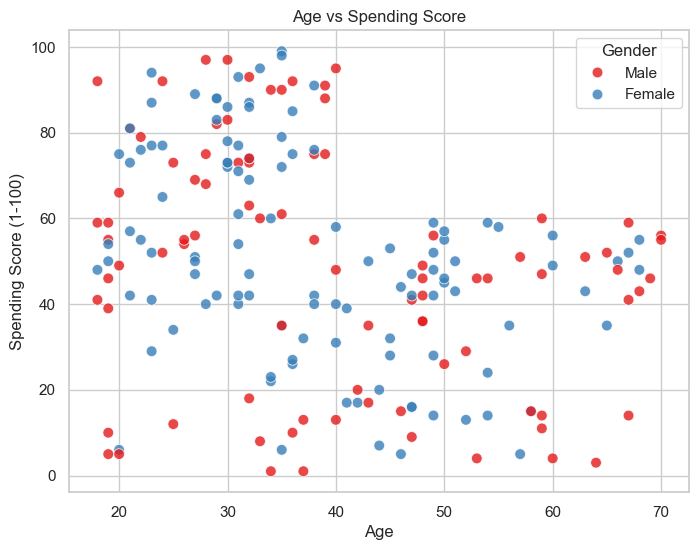

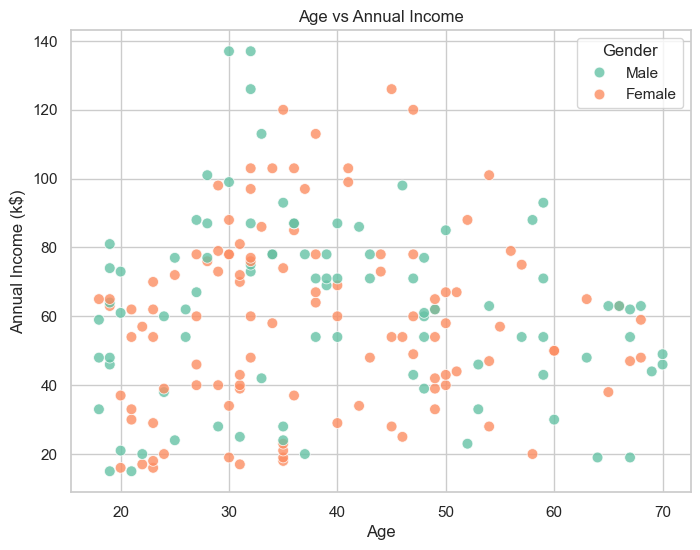

In [9]:
# Age vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", 
    y="Spending Score (1-100)", 
    hue="Gender", 
    data=df, 
    palette="Set1", 
    s=60, alpha=0.8
)
plt.title("Age vs Spending Score")
plt.show()

# Age vs Annual Income
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", 
    y="Annual Income (k$)", 
    hue="Gender", 
    data=df, 
    palette="Set2", 
    s=60, alpha=0.8
)
plt.title("Age vs Annual Income")
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Select the features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier inspection
X_scaled = pd.DataFrame(X_scaled, columns=['Income_scaled', 'Spending_scaled'])

X_scaled.head()


,Income_scaled,Spending_scaled
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

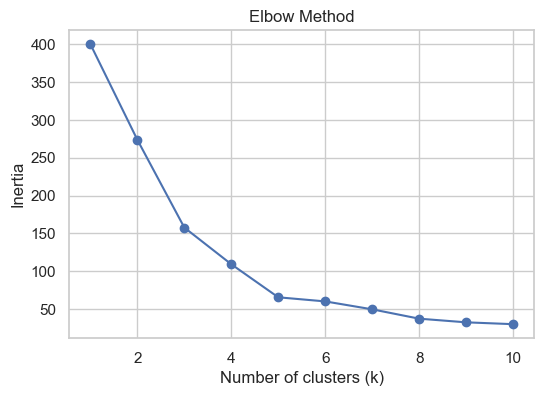

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

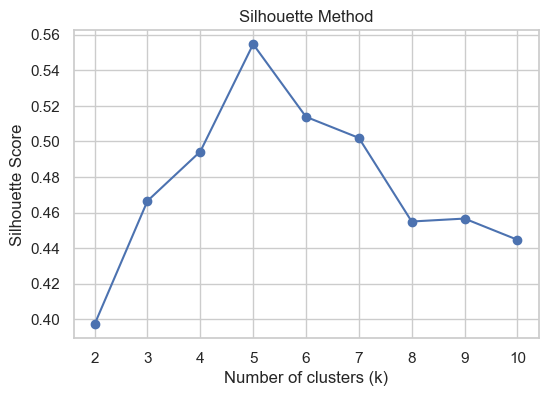

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [22]:
# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = labels

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


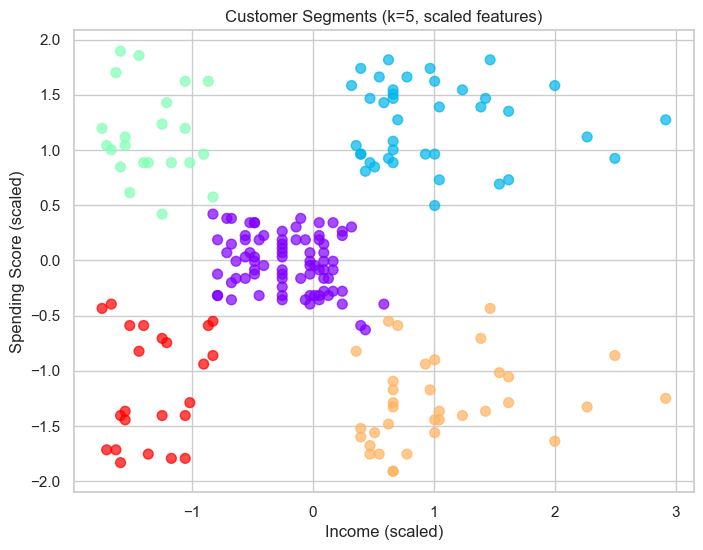

In [52]:
# Scatterplot in scaled space
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled['Income_scaled'], 
    X_scaled['Spending_scaled'], 
    c=labels, cmap='rainbow', s=50, alpha=0.7
)
plt.xlabel("Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments (k=5, scaled features)")
plt.show()


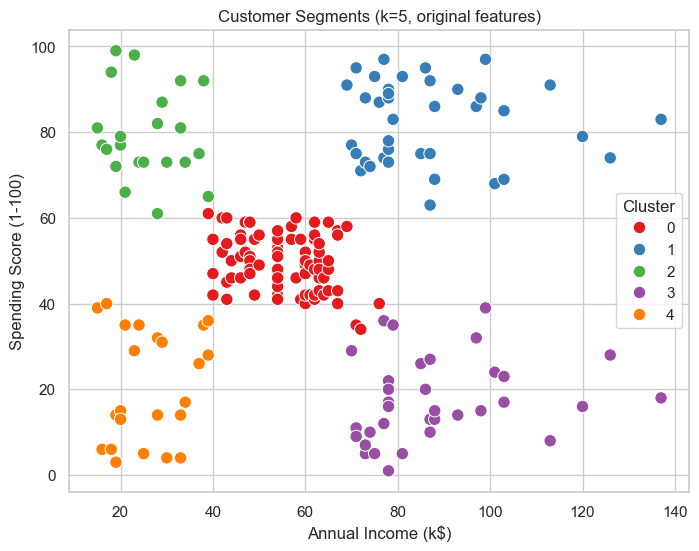

In [50]:
# Scatterplot in original scale
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=80
)
plt.title("Customer Segments (k=5, original features)")
plt.show()


In [25]:
# Cluster profiling
cluster_profile = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.value_counts().index[0]  # most common gender
}).rename(columns={'CustomerID': 'Count'}).reset_index()

cluster_profile


,Cluster,Count,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0,81,42.716049,55.296296,49.518519,Female
1,1,39,32.692308,86.538462,82.128205,Female
2,2,22,25.272727,25.727273,79.363636,Female
3,3,35,41.114286,88.200000,17.114286,Male
4,4,23,45.217391,26.304348,20.913043,Female


C:\Users\ahmed\AppData\Local\Temp\ipykernel_21524\3755442100.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Annual Income (k$)', palette='Set2', ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_21524\3755442100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Annual Income (k$)', palette='Set2', ci=None)


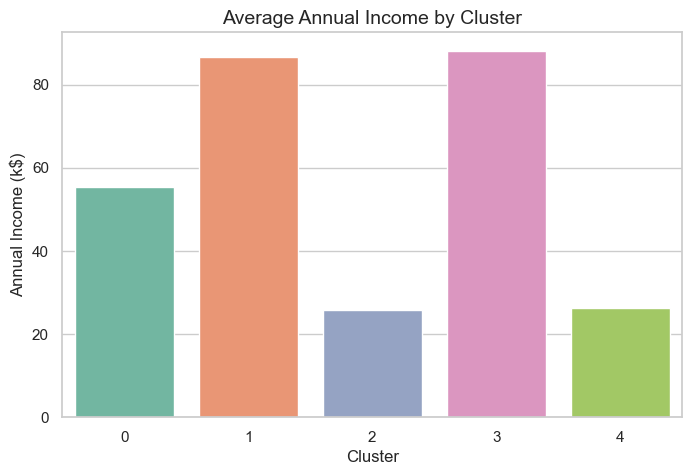

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Cluster', y='Annual Income (k$)', palette='Set2', ci=None)
plt.title("Average Annual Income by Cluster", fontsize=14)
plt.ylabel("Annual Income (k$)")
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_21524\2352867424.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='Set1', ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_21524\2352867424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='Set1', ci=None)


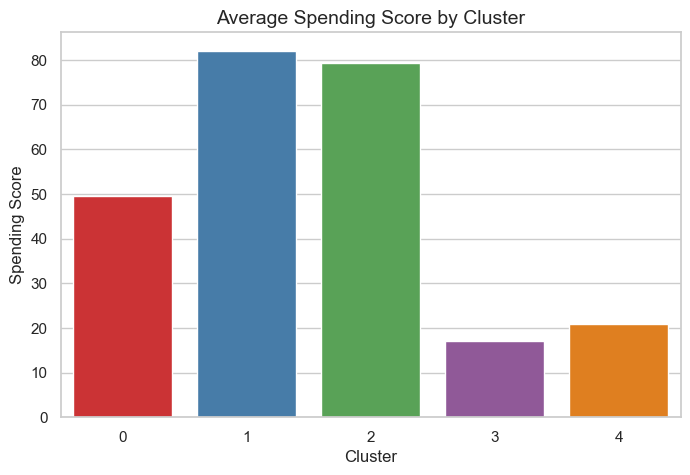

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='Set1', ci=None)
plt.title("Average Spending Score by Cluster", fontsize=14)
plt.ylabel("Spending Score")
plt.show()


In [29]:
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean().reset_index()
avg_spending.rename(columns={'Spending Score (1-100)': 'Average_Spending'}, inplace=True)
avg_spending


,Cluster,Average_Spending
0,0,49.518519
1,1,82.128205
2,2,79.363636
3,3,17.114286
4,4,20.913043


C:\Users\ahmed\AppData\Local\Temp\ipykernel_21524\1131101650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spending, x='Cluster', y='Average_Spending', palette='Set1')


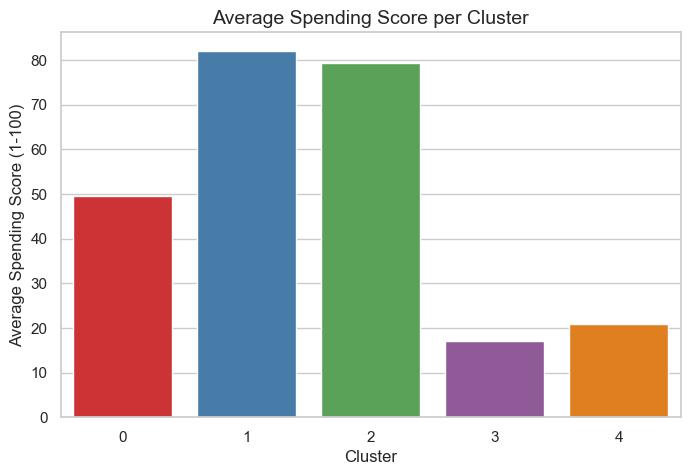

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=avg_spending, x='Cluster', y='Average_Spending', palette='Set1')
plt.title("Average Spending Score per Cluster", fontsize=14)
plt.ylabel("Average Spending Score (1-100)")
plt.show()


In [55]:
# Add an Interpretation column
cluster_summary['Interpretation'] = [
    "Average customers, medium income and spending",
    "High-value, high-income and high-spending",
    "Young, high-spending, low-income",
    "Low-value, high-income but low-spending",
    "Low-value, low-income and low-spending"
]

# Rearrange columns for the final table
final_summary = cluster_summary[['Cluster', 'Count', 'Age', 'Income', 'Spending', 'Gender', 'Average_Spending', 'Interpretation']]
final_summary


,Cluster,Count,Age,Income,Spending,Gender,Average_Spending,Interpretation
0,0,81,42.716049,55.296296,49.518519,Female,49.518519,"Average customers, medium income and spending"
1,1,39,32.692308,86.538462,82.128205,Female,82.128205,"High-value, high-income and high-spending"
2,2,22,25.272727,25.727273,79.363636,Female,79.363636,"Young, high-spending, low-income"
3,3,35,41.114286,88.200000,17.114286,Male,17.114286,"Low-value, high-income but low-spending"
4,4,23,45.217391,26.304348,20.913043,Female,20.913043,"Low-value, low-income and low-spending"
